# Ejemplo de Análisis Exploratorio de Datos

## Programacion Avanzada - Python <br>

Docente: Cristian Guarnizo

A continuacion importamos la librerias que necesitamos para este notebook.

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Auto MPG Dataset 
Esta base de datos se emplea para hacer prediccion (modelo de regresion) a partir del peso, potencia, cilindraje y desplazamiento de diferentes tipos de vehiculos.

Usamos la libreria Pandas para obtener una descrpicion estadistica del conjunto de datos. La descripcion de esta base de datos puede ser encontrada en [UCI_MGP_data_link](https://archive.ics.uci.edu/ml/datasets/auto+mpg). Continuamos definiendo los nombres de las columnas y leemos los valores del archivo que descargamos.

In [35]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(URL, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Revisamos si los datos contienen valores "nan". Si es asi, los eliminamos. La siguiente linea de comando nos indica cuantos registros son "nan".

In [36]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Para mantener este ejemplo sencillo, eliminamos las final con "nan" ejecutando la siguiente linea.

In [37]:
dataset = dataset.dropna()

La columna "Origin" usa un valor entero para representa el pais donde el carro fue construido. Cambiamos esto por una representación "one-hot". Entonces, extraemos la columna Origin y la reemplazamos con tres nuevamos columnas que indican cada pais.

In [38]:
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


## Analisis Exploratorio de los datos

Ahora observamos las relaciones de que existen entre los datos, por medio de un scatter plot, donde en la diagonal estimamos la densidad de probabilidad por medio de KDE (Kernel Density Estimatio).

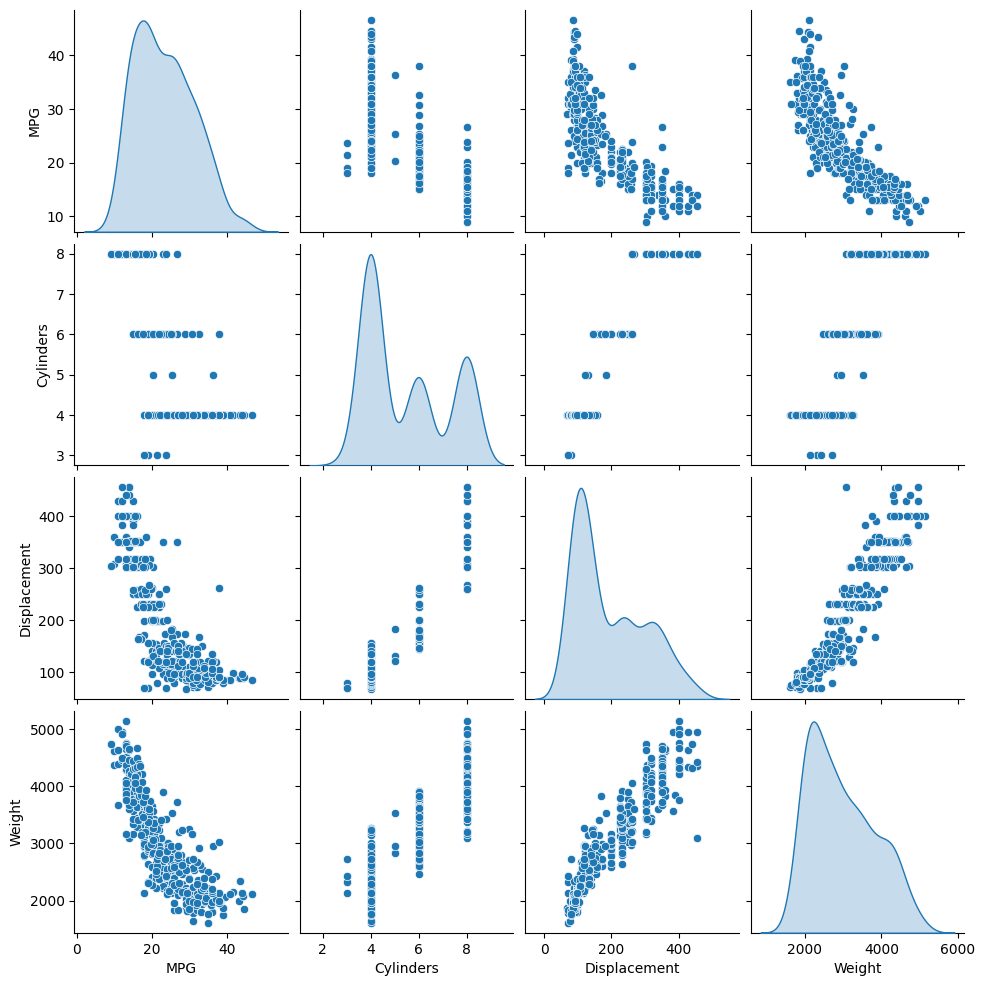

In [27]:
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

La variable que tipicamente se emplea para predicción es MPG. Ahora observamos las correlaciones que existen entre todas la variables.

---



[]

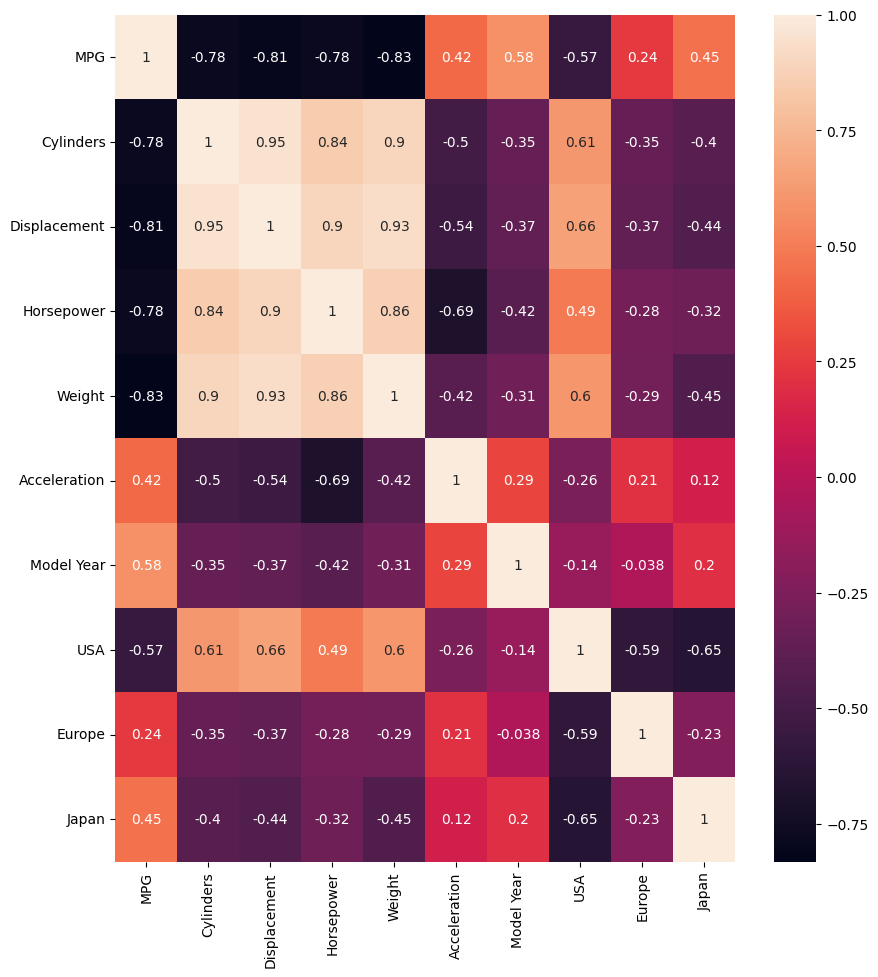

In [28]:
plt.figure(figsize=(10,11))
sns.heatmap(dataset.corr(), annot=True)
plt.plot()

Ahora analizamos con BoxPlots el comportamiento de cada variable.

<Axes: >

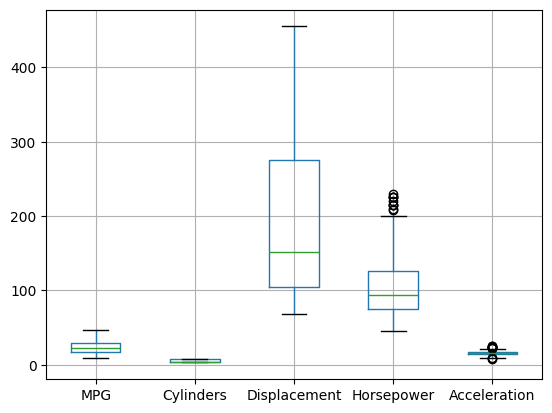

In [29]:
dataset.boxplot(column=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Acceleration'])

## Analisis por agrupamiento
Queremos obtener la media de MPG por Origen de construccion

In [30]:
MPGmean = dataset.groupby(origin)["MPG"].mean()

In [31]:
MPGmean

Origin
1    20.033469
2    27.602941
3    30.450633
Name: MPG, dtype: float64

<Axes: xlabel='Origin'>

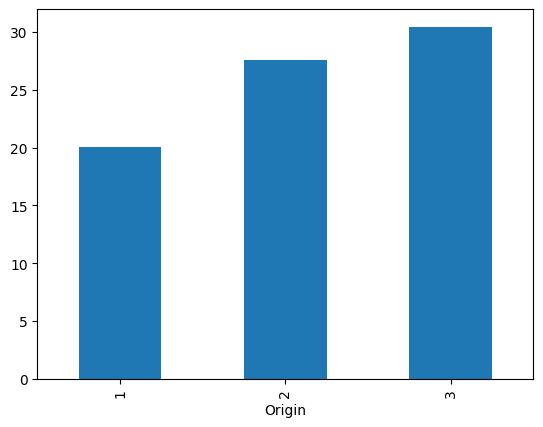

In [32]:
MPGmean.plot.bar()

### Filtrando los datos de USA
Queremos graficar el histograma de Horsepower solo de los datos de USA.

<Axes: ylabel='Frequency'>

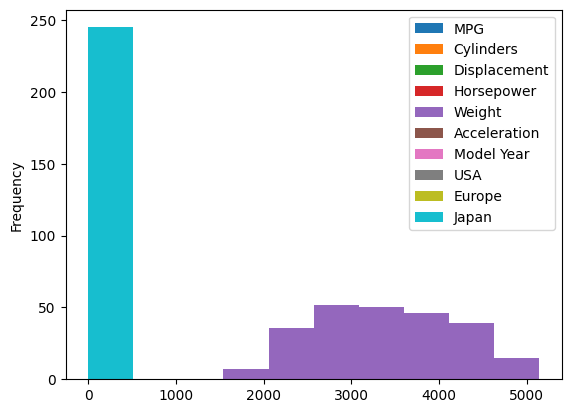

In [39]:
dataset[dataset['USA']==1].plot.hist()

<Axes: ylabel='Frequency'>

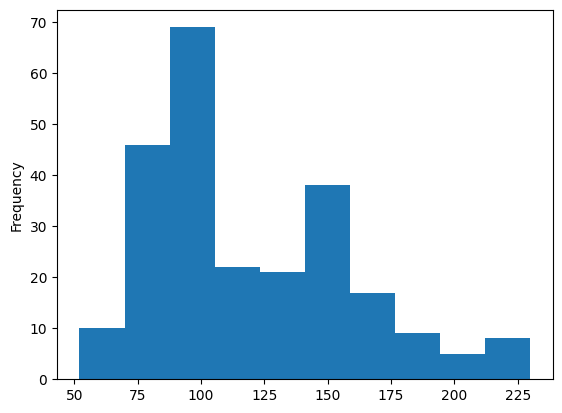

In [33]:
dataset[dataset['USA']==1]['Horsepower'].plot.hist()

### Determinar valores maximos y minimos
Podemos hacer uso de los comandos `min` y `max`, como tambien de los comando `argmax` y `argmin`.

In [41]:
print('Ubicacion del maximo :', dataset['MPG'].argmax())
print('Valor del maximo :', dataset['MPG'].max())

Ubicacion del maximo : 320
Valor del maximo : 46.6


# Ejercicio
1. Determinar el valor maximo y minimo de Horsepower para cada Origen. a) Filtrando los datos. b) Usando `groupby`.

In [ ]:
#Hacer codigo aqui

2. Determinar el numero de los registro (fila) donde estan ubicados los maximos y minimos de MPG, Horsepower y Acceleration. Indicar cual es el año del modelo y el pais de origen en cada caso.